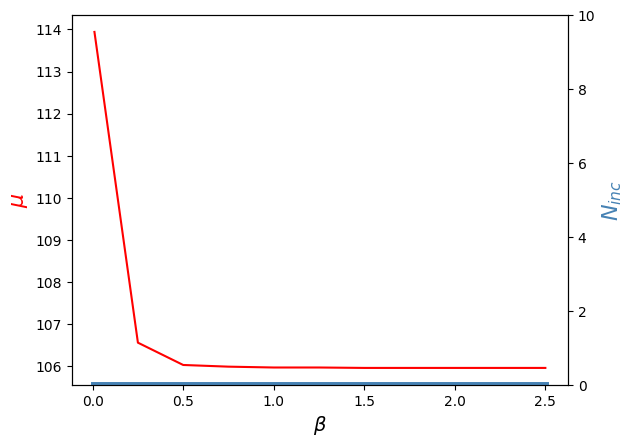

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

df = pd.read_csv('results/Admission.csv', sep=';')

df = df.head(10)
#define subplots
fig,ax = plt.subplots()

#add first line to plot
ax.plot(df.beta, df.mu, color='red')

#add x-axis label
ax.set_xlabel(r'$\beta$', fontsize=14)

#add y-axis label
ax.set_ylabel(r'$\mu$', color='red', fontsize=16)

#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()

#add second line to plot
ax2.plot(df.beta, df.Ninc, color='steelblue', linewidth=5)
ax2.set_ylim(bottom=0, top=10)

#add second y-axis label
ax2.set_ylabel(r'$N_{inc}$', color='steelblue', fontsize=16)

fig.savefig('../ongoing_research/admission_beta.png', bbox_inches='tight', dpi=150)

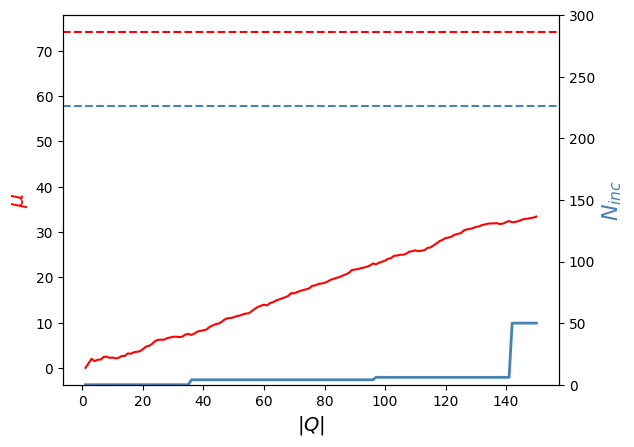

In [25]:
df = pd.read_csv('results/Q_admission.csv', sep=';')

#define subplots
fig,ax = plt.subplots()

#add first line to plot
ax.plot(df['|Q|'], df.mu, color='red')
ax.axhline(y=74.18, color='red', linestyle='--')

#add x-axis label
ax.set_xlabel(r'$|Q|$', fontsize=14)

#add y-axis label
ax.set_ylabel(r'$\mu$', color='red', fontsize=16)

#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()

#add second line to plot
ax2.plot(df['|Q|'], df.Ninc, color='steelblue', linewidth=2)
ax2.axhline(y=226, color='steelblue', linestyle='--')
ax2.set_ylim(bottom=0, top=300)

#add second y-axis label
ax2.set_ylabel(r'$N_{inc}$', color='steelblue', fontsize=16)

fig.savefig('../ongoing_research/admission_Q.png', bbox_inches='tight', dpi=150)